<a href="https://colab.research.google.com/github/ateachment/Moodle-KI/blob/main/xorKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training of XOR

In [54]:
import numpy as np
import matplotlib.pyplot as plt

### Activation Functions ###

In [57]:
# not suitable
def linear(x):
  return x
def linearDerived(output):
  return 1
def step(x):
  return (x > 0) * 1    # if x > 0 then return 1, else return 0 
def stepDerived(x):
  return (x == 0) * float("inf")    # if x > 0 then return infinite (endless), else return 0 

# suitable
def relu(x):
  return (x > 0) * x    # if x > 0 then return x, else return 0 
def reluDerived(output):
  return output > 0     # if output > 0 then return True, else return False

def sigmoid(x):         
  return 1/(1 + np.exp(-x))
def sigmoidDerived(output):   # derived sigmoid (derive = dt. ableiten)
  return output * (1 - output)

def tanh(x):         
  return 2/(1 + np.exp(-2*x)) - 1
def tanhDerived(output):   # derived sigmoid (derive = dt. ableiten)
  return 1 - output**2



### Training

Randomly initialized weights:
[[-0.06467004  0.72944072 -0.66134887]
 [ 0.91107375 -0.95986873 -0.18832813]]
[[ 0.74812068]
 [-0.83933947]
 [-0.03614717]]
Error:1.3907037006525464
Error:1.2191293312834999
Error:1.1290171366045567
Error:1.0441276443630048
Error:0.9638543989797766
Error:0.8922262246261853
Error:0.8291768750628239
Error:0.7705005354003205
Error:0.7103045510739611
Error:0.641764346487816
Error:0.5576552861854457
Error:0.4558202263406451
Error:0.3458492579700427
Error:0.24318873349583842
Error:0.15857036467661145
Error:0.09592336779556304
Error:0.05405575260063997
Error:0.028631315249637405
Error:0.014420545471294108
Error:0.006988655277580056
Trained weights:
[[ 1.83664012  0.42644347 -1.13647619]
 [ 1.76589213 -1.33596899  0.20806306]]
[[1.6528099 ]
 [0.97873857]
 [1.23923391]]


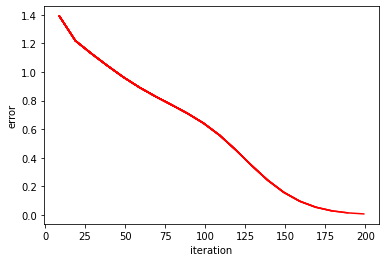

In [60]:
inputs = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]])

output = np.array([[0,1,1,0]]).T

hidden_size = 3 # hidden layer with 3 neurons

def train(iterations, alpha, activFunc, activFuncDerived):
  weights_0_1 = 2 * np.random.random((2, hidden_size)) - 1   # random -1 <-> +1
  weights_1_2 = 2 * np.random.random((hidden_size, 1)) - 1
  print("Randomly initialized weights:")
  print(weights_0_1)
  print(weights_1_2)

  iterationList = []
  layer_2_errorList = []

  for iteration in range(iterations):
    layer_2_error = 0
    for i in range(len(inputs)):
      layer_0 = inputs[i:i+1]
      z = np.dot(layer_0, weights_0_1)
      layer_1 = activFunc(np.dot(layer_0, weights_0_1))  
      layer_2 = np.dot(layer_1, weights_1_2)
      layer_2_delta = (layer_2 - output[i:i+1])
      layer_1_delta = layer_2_delta.dot(weights_1_2.T * activFuncDerived(layer_1))

      weights_1_2 -= alpha * layer_1.T.dot(layer_2_delta)
      weights_0_1 -= alpha * layer_0.T.dot(layer_1_delta)

      layer_2_error += np.sum(layer_2_delta **2)

    if iteration % 10 == 9:
      print("Error:" + str(layer_2_error))
      iterationList.append(iteration)                   # collect plotting data
      layer_2_errorList.append(layer_2_error)
      plt.plot(iterationList, layer_2_errorList,'r')
      plt.xlabel('iteration')
      plt.ylabel('error')

  print("Trained weights:")
  print(weights_0_1)
  print(weights_1_2)

#train(10, 0.01, linear, linearDerived)       # here no convergence
#train(200, 0.8, sigmoid, sigmoidDerived)     # convergence
train(200, 0.1, tanh, tanhDerived )           
#train(60, 0.2, relu, reluDerived)            # converges here sometimes if enough positive weights
#train(10, 0.01, step, stepDerived)           # fails always

